#The Social Comment - Machine Learning Test



Name: Viren Baria

Email: virenbaria17@gmail.com

Contact No: 9867144297/8850914822

[LinkedIn](https://www.linkedin.com/in/viren-baria-78806115b/) || [Github](https://github.com/bumblebee26)

## Uploading the datasets 

In [1]:
from google.colab import files
uploaded = files.upload()

# for fn in uploaded.keys():
#   print('User uploaded file "{name}" with length {length} bytes'.format(
#       name=fn, length=len(uploaded[fn])))
  
for name, data in uploaded.items():
  with open(name, 'wb') as f:
    f.write(data)
    print ('saved file', name)

Saving Mldata.zip to Mldata.zip
saved file Mldata.zip


In [2]:
!unzip Mldata.zip

Archive:  Mldata.zip
  inflating: posts.csv               
  inflating: users.csv               
  inflating: views.csv               


## Importing required libraries

In [0]:
import pandas as pd
import numpy as np
import os
pd.set_option("display.max_rows", None, "display.max_columns", None)

import warnings
warnings.filterwarnings('ignore')

### 'posts.csv'

In [4]:
posts = pd.read_csv('posts.csv')
posts.rename(columns={'_id':'post_id', ' post_type':'post_type'}, inplace=True)
posts.category.fillna("General", inplace = True) 
posts.head()

,post_id,title,category,post_type
0,5d62abaa65218653a132c956,hello there,Plant Biotechnology,blog
1,5d6d39567fa40e1417a4931c,Ml and AI,Artificial Intelligence|Machine Learning|Infor...,blog
2,5d7d23315720533e15c3b1ee,What is an Operating System ?,Operating Systems,blog
3,5d7d405e5720533e15c3b1f3,Lord Shiva,Drawings,artwork
4,5d80dfbc6c53455f896e600e,How Competition law evolved?,Competition Laws,blog


In [5]:
print(posts.shape)
posts.info()

(493, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493 entries, 0 to 492
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   post_id    493 non-null    object
 1   title      493 non-null    object
 2   category   493 non-null    object
 3   post_type  493 non-null    object
dtypes: object(4)
memory usage: 15.5+ KB


There are 493 posts with 4 features. There were a few Null values in 'category' column. These null values are in 'category' column, where 'post_type' is 'project'. I have replaced this null values with a 'post_type' : 'General'

### 'users.csv'

In [6]:
users = pd.read_csv('users.csv')
users.rename(columns={'_id':'user_id'}, inplace=True)
users.head()

,user_id,name,gender,academics
0,5d60098a653a331687083238,Nivesh Singh Chauhan,male,undergraduate
1,5d610ae1653a331687083239,Gaurav Sharma,male,graduate
2,5d618359fc5fcf3bdd9a0910,Akshay Mishra,male,undergraduate
3,5d6d2bb87fa40e1417a49315,Saksham Mathur,male,undergraduate
4,5d7c994d5720533e15c3b1e9,Varun Chowhan,male,undergraduate


In [7]:
print(users.shape)
users.info()

(118, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   user_id    118 non-null    object
 1   name       118 non-null    object
 2   gender     118 non-null    object
 3   academics  118 non-null    object
dtypes: object(4)
memory usage: 3.8+ KB


There are 118 users with 4 features. There are a no Null values in any columns so it is a clean dataset.

### 'views.csv'

In [8]:
views = pd.read_csv('views.csv')
views.head()

,user_id,post_id,timestamp
0,5df49b32cc709107827fb3c7,5ec821ddec493f4a2655889e,2020-06-01T10:46:45.131Z
1,5ed3748576027d35905ccaab,5ed4cbadbd514d602c1531a6,2020-06-01T09:39:20.021Z
2,5ed0defa76027d35905cc2de,5eac305f10426255a7aa9dd3,2020-06-01T08:12:42.682Z
3,5ed0defa76027d35905cc2de,5ed1ff0276027d35905cc60d,2020-06-01T08:10:23.880Z
4,5ed0defa76027d35905cc2de,5ed3820f76027d35905ccac8,2020-06-01T08:08:54.124Z


In [9]:
print(views.shape)
views.info()

(1449, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1449 entries, 0 to 1448
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   user_id    1449 non-null   object
 1   post_id    1449 non-null   object
 2   timestamp  1449 non-null   object
dtypes: object(3)
memory usage: 34.1+ KB


There are 1449 view pattens with 3 features. There are a no Null values in any columns so it is a clean dataset.

## Data Description

### Users
1. _id: a unique alphanumeric id of the user (string) 
2. name: Name of user (string)
3. gender: Gender of user (male | female)
4. academics: Education of the use (undergraduate | graduate) 
 
### Posts
1. _id: a unique alphanumeric id of the post (string) 
2. title: Title of the post (string)
3. category: Category of the post (string)
4. post_type: Type of the post (blog | artwork | skill | project) 

###  Views 
 
1. user_id : a unique alphanumeric id of the user (string)
2. post_id : a unique alphanumeric id of the post (string)
3. time stamp: timestamp of when user viewed the post (ISO time format) 

## Compeleting the dataset by merging the csv files

In [10]:
df = views.merge(posts, on='post_id', how='left')
df.head()

,user_id,post_id,timestamp,title,category,post_type
0,5df49b32cc709107827fb3c7,5ec821ddec493f4a2655889e,2020-06-01T10:46:45.131Z,Save Earth.,Visual Arts|Graphic Design|Artistic design|Gra...,artwork
1,5ed3748576027d35905ccaab,5ed4cbadbd514d602c1531a6,2020-06-01T09:39:20.021Z,Configure CI/CD Pipeline in GitLab and deploym...,Computer Technology|Computer Application|Infor...,blog
2,5ed0defa76027d35905cc2de,5eac305f10426255a7aa9dd3,2020-06-01T08:12:42.682Z,She got a new hairstyle! Photo by Chirag,Photography,artwork
3,5ed0defa76027d35905cc2de,5ed1ff0276027d35905cc60d,2020-06-01T08:10:23.880Z,AWS services and how to launch OS on AWS Cloud,Computer Technology|Cloud Computing,blog
4,5ed0defa76027d35905cc2de,5ed3820f76027d35905ccac8,2020-06-01T08:08:54.124Z,Configure Docker with Django; PostgreSQL; Pg-a...,Computer Technology|Computer Application|Infor...,blog


In [11]:
df = df.merge(users, on='user_id', how='left')
df.head()

,user_id,post_id,timestamp,title,category,post_type,name,gender,academics
0,5df49b32cc709107827fb3c7,5ec821ddec493f4a2655889e,2020-06-01T10:46:45.131Z,Save Earth.,Visual Arts|Graphic Design|Artistic design|Gra...,artwork,Niriksha Sharma,female,undergraduate
1,5ed3748576027d35905ccaab,5ed4cbadbd514d602c1531a6,2020-06-01T09:39:20.021Z,Configure CI/CD Pipeline in GitLab and deploym...,Computer Technology|Computer Application|Infor...,blog,Parth Vijay,male,undergraduate
2,5ed0defa76027d35905cc2de,5eac305f10426255a7aa9dd3,2020-06-01T08:12:42.682Z,She got a new hairstyle! Photo by Chirag,Photography,artwork,Asif Hossain,male,undergraduate
3,5ed0defa76027d35905cc2de,5ed1ff0276027d35905cc60d,2020-06-01T08:10:23.880Z,AWS services and how to launch OS on AWS Cloud,Computer Technology|Cloud Computing,blog,Asif Hossain,male,undergraduate
4,5ed0defa76027d35905cc2de,5ed3820f76027d35905ccac8,2020-06-01T08:08:54.124Z,Configure Docker with Django; PostgreSQL; Pg-a...,Computer Technology|Computer Application|Infor...,blog,Asif Hossain,male,undergraduate


In [12]:
df.shape

(1449, 9)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1449 entries, 0 to 1448
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   user_id    1449 non-null   object
 1   post_id    1449 non-null   object
 2   timestamp  1449 non-null   object
 3   title      1447 non-null   object
 4   category   1447 non-null   object
 5   post_type  1447 non-null   object
 6   name       1449 non-null   object
 7   gender     1449 non-null   object
 8   academics  1449 non-null   object
dtypes: object(9)
memory usage: 113.2+ KB


In [14]:
df1 = df[df.isna().any(axis=1)]
df.shape

(1449, 9)

In [15]:
df = df.dropna(thresh=8)
df.shape

(1447, 9)

In [16]:
df.head()

,user_id,post_id,timestamp,title,category,post_type,name,gender,academics
0,5df49b32cc709107827fb3c7,5ec821ddec493f4a2655889e,2020-06-01T10:46:45.131Z,Save Earth.,Visual Arts|Graphic Design|Artistic design|Gra...,artwork,Niriksha Sharma,female,undergraduate
1,5ed3748576027d35905ccaab,5ed4cbadbd514d602c1531a6,2020-06-01T09:39:20.021Z,Configure CI/CD Pipeline in GitLab and deploym...,Computer Technology|Computer Application|Infor...,blog,Parth Vijay,male,undergraduate
2,5ed0defa76027d35905cc2de,5eac305f10426255a7aa9dd3,2020-06-01T08:12:42.682Z,She got a new hairstyle! Photo by Chirag,Photography,artwork,Asif Hossain,male,undergraduate
3,5ed0defa76027d35905cc2de,5ed1ff0276027d35905cc60d,2020-06-01T08:10:23.880Z,AWS services and how to launch OS on AWS Cloud,Computer Technology|Cloud Computing,blog,Asif Hossain,male,undergraduate
4,5ed0defa76027d35905cc2de,5ed3820f76027d35905ccac8,2020-06-01T08:08:54.124Z,Configure Docker with Django; PostgreSQL; Pg-a...,Computer Technology|Computer Application|Infor...,blog,Asif Hossain,male,undergraduate


#### Removed the rows where more than 1 null values were found. After in depth analysis, there were two rows with more than 1 null values. In this rows, 'post_type', 'title' and 'category' were null. So, these data wouldn't have contributed effectively to the model. Hence, I removed this two rows.  

In [17]:
df.category.value_counts()

Photography                                                                                                             241
Drawings                                                                                                                149
General                                                                                                                  88
Painting                                                                                                                 75
Computer Technology|Machine Learning                                                                                     40
Computer Technology|Cloud Computing                                                                                      27
Drawings|Fashion Design|Illustration|Watercolours                                                                        22
Art                                                                                                                      18
Computer

#### Removing redundant features like 'name' and 'title'

In [0]:
# df = df.drop(columns=['name', 'timestamp'])
# df = df.reset_index(drop=True)
# df.head()

In [19]:
df.shape

(1447, 9)

## Exploratory Data Analysis

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

# plot stylings
plt.style.use('fivethirtyeight')
%matplotlib inline

#### 1. Post viewed by gender and their academics

In [21]:
pd.crosstab(df.title, df.gender, margins=True).style.background_gradient(cmap='summer_r')

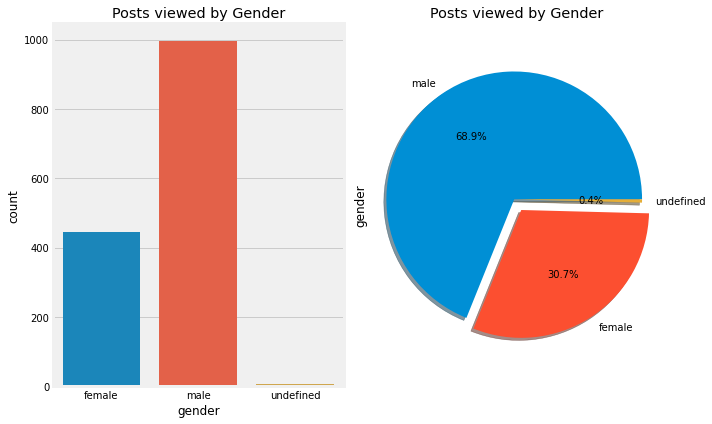

In [22]:
fig, ax = plt.subplots(1,2,figsize = (10,6))

sns.countplot('gender',data=df,ax=ax[0])
ax[0].set_title('Posts viewed by Gender')

df['gender'].value_counts().plot.pie(explode=[0,0.1,0],autopct='%1.1f%%',shadow=True,ax=ax[1])
ax[1].set_title('Posts viewed by Gender')
ax[1].axis('equal') 

fig.tight_layout()
plt.show()

In [23]:
pd.crosstab(df.title, [df.academics, df.gender], margins=True).style.background_gradient(cmap='summer_r')

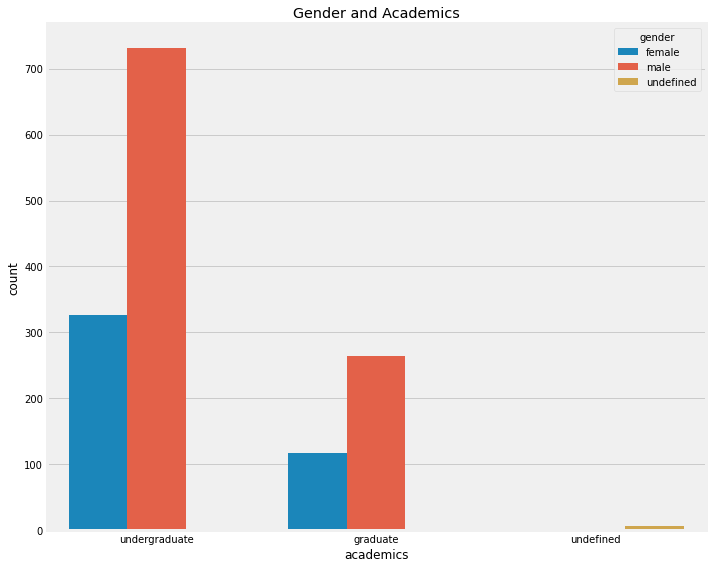

In [24]:
fig, ax = plt.subplots(figsize = (10,8))
sns.countplot('academics',hue='gender',data=df)
ax.set_title('Gender and Academics')

fig.tight_layout()
plt.show()

#### 2. Popular categories 

In [0]:
# Displaying top categories
rest, keys, values = 0, [], []
x = df.category.value_counts()
for i,j in x.items():
    if j>=10:
        keys.append(i)
        values.append(j)
    else:
        rest += j
keys.append('Remaining')
values.append(rest)
# print(len(keys))
# print(len(values))

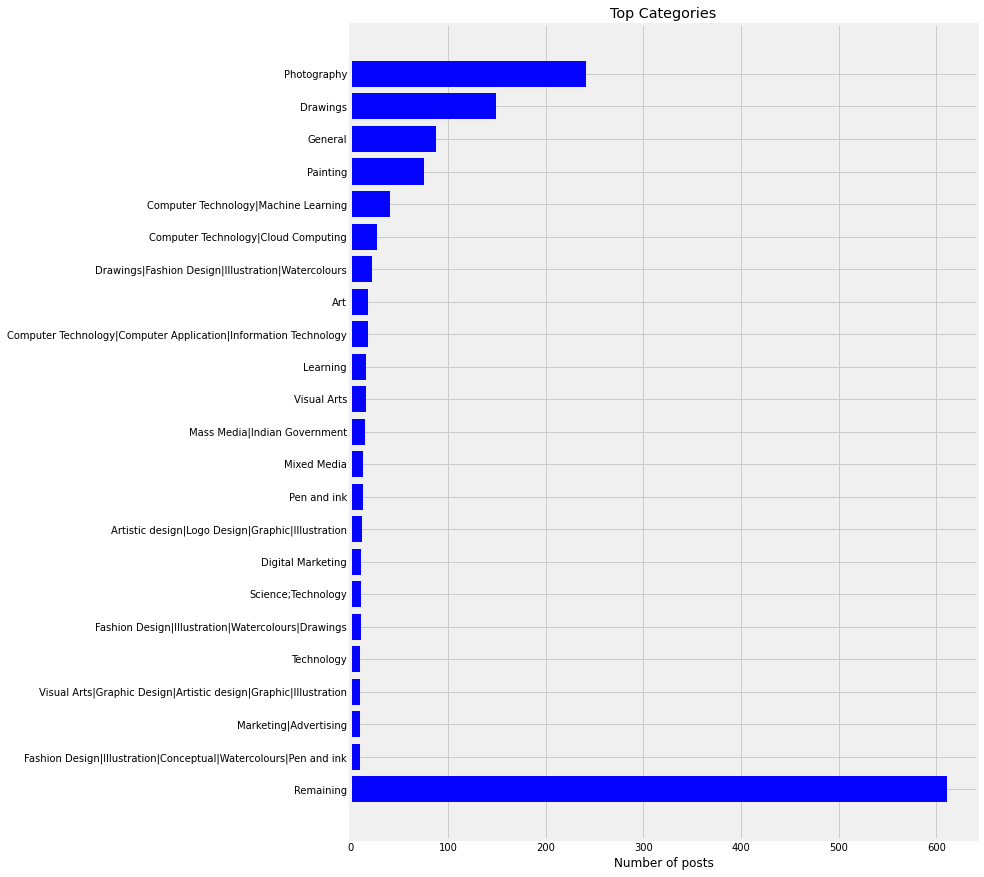

In [26]:
fig, ax = plt.subplots(figsize = (10, 15))
y_pos = np.arange(len(values))
ax.barh(y_pos, values[::-1], color = ['b'], alpha=0.99)
ax.set_yticks(y_pos)
ax.set_yticklabels(keys[::-1])
ax.set_xlabel('Number of posts')
ax.set_title('Top Categories')

plt.show()

#### 3. Popular post_type

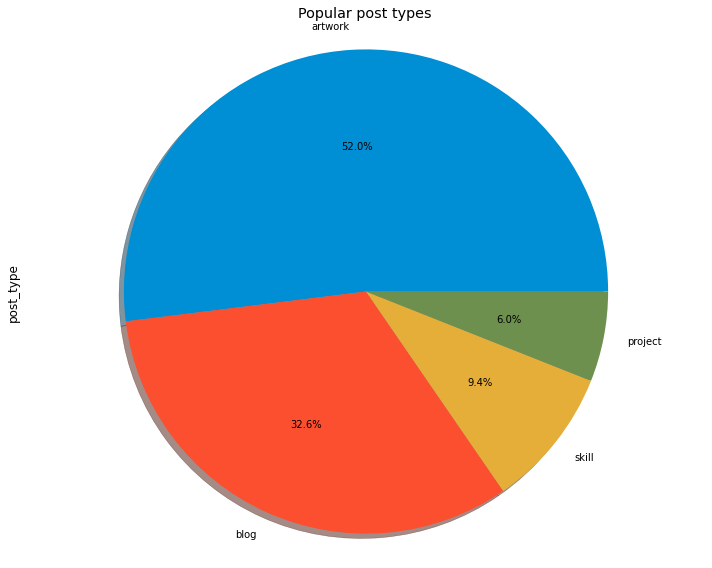

In [27]:
fig, ax = plt.subplots(figsize = (10,8))

df['post_type'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)
ax.set_title('Popular post types')
ax.axis('equal') 

fig.tight_layout()
plt.show()

## Beginning with the Recommendation process

As mentioned in the instruction pdf we have  build a Recommendation System, recommending the items based on the following:
1. Content Based Filtering 
2. Collaborative Filtering 

End result should be a system that: 
1. Recommend posts for the given user 
2. Recommend similar posts for the given post 

### Content Based Filtering

Content-based filtering algorithms are given user preferences for items and recommend similar items based on a domain-specific notion of item content. This approach also extends naturally to cases where item metadata is available (e.g., movie stars, book authors, and music genres).

In [0]:
# Importing required libraries

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel 

#### Category based filtering of posts

In [29]:
tf = TfidfVectorizer(analyzer='word', sublinear_tf=True, ngram_range=(1, 3), min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(posts['category'])
tfidf_matrix.shape

(493, 1100)

In [30]:
tf.get_feature_names()[:-30:-1]

['zoology environmental biology',
 'zoology environmental',
 'zoology ecology',
 'zoology',
 'work substance abuse',
 'work substance',
 'work social tech',
 'work social interventions',
 'work social',
 'work ngo',
 'work humanities social',
 'work humanities',
 'work health education',
 'work health',
 'work',
 'wood crafts craft',
 'wood crafts',
 'wood carving',
 'wood',
 'web designing database',
 'web designing artificial',
 'web designing',
 'web',
 'watercolours pen ink',
 'watercolours pen',
 'watercolours painting',
 'watercolours drawings',
 'watercolours acrylics',
 'watercolours 2d composition']

**Calculating Cosine Similarity**

The method of calculating the user’s likes / dislikes / measures is calculated by taking the cosine of the angle between the user profile vector (Ui ) and the document vector; or in our case, the angle between two document vectors.

The ultimate reason behind using cosine is that the value of cosine will increase as the angle between vectors with decreases, which signifies more similarity.*italicized text*



In [31]:
cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_similarities[0]

array([1.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [32]:
postid = posts['post_id']
indices = pd.Series(posts.index, index=posts['post_id'])
indices.head()

post_id
5d62abaa65218653a132c956    0
5d6d39567fa40e1417a4931c    1
5d7d23315720533e15c3b1ee    2
5d7d405e5720533e15c3b1f3    3
5d80dfbc6c53455f896e600e    4
dtype: int64

In [0]:
def item(id):
    return posts.loc[posts['post_id'] == id]['title'].tolist()[0]

In [0]:
def get_recommendations(postid, num, indices):
    idx = indices[postid]
    sim_scores = list(enumerate(cosine_similarities[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:num+1]
    # print(sim_scores)
    indices = [i[0] for i in sim_scores]
    print("Recommending " + str(num) + " posts similar to \"" + item(postid) + "\" ...")
    return posts.iloc[indices]

In [35]:
# Attempt 1
get_recommendations('5eac305f10426255a7aa9dd3', 10, indices)

Recommending 10 posts similar to "She got a new hairstyle! Photo by Chirag" ...


,post_id,title,category,post_type
23,5dde6a91369b28584ecca156,Spirituality,Photography,artwork
62,5e3ab644eab55d319938a72d,Travelling,Photography,artwork
175,5e7df068a3258347b42f2125,screw town,Photography,artwork
176,5e7df283a3258347b42f2128,screw2,Photography,artwork
205,5e8307ada3258347b42f23ec,Aesthetic,Photography,artwork
206,5e8308c4a3258347b42f23ed,Quarantined,Photography,artwork
207,5e8309a9a3258347b42f23f2,Bloom🌸,Photography,artwork
208,5e830a6ca3258347b42f23f6,Dog❤️,Photography,artwork
212,5e84657da3258347b42f2452,Leap of faith,Photography,artwork
217,5e8837fba3258347b42f255b,The silence that shouts,Photography,artwork


In [36]:
# Attempt 2
get_recommendations('5d6d39567fa40e1417a4931c', 10, indices)

Recommending 10 posts similar to "Ml and AI" ...


,post_id,title,category,post_type
122,5e5bdf4fd701ab08af792bfd,Artificial Intelligence,Computer Technology|Artificial Intelligence,blog
170,5e7c78fdcfc8b713f5ac7daa,Types Of AI.,Computer Technology|Artificial Intelligence,blog
186,5e81a4f2a3258347b42f21d3,7 Best Python Data Science Courses & Certifica...,Computer Technology|Machine Learning,blog
224,5e897ab4a3258347b42f25ca,10 Best Artificial Intelligence (AI) Courses O...,Computer Technology|Machine Learning,blog
450,5ecd5d417023451e662235c5,"Machine Learning”&“Operations"" (MlOps)",Computer Technology|Machine Learning,blog
454,5ecf818376027d35905cbf03,GAN's INTRODUCTION,Computer Technology|Machine Learning,blog
455,5ecf96e876027d35905cbf46,GAN's Part(2),Computer Technology|Machine Learning,blog
456,5ecfa0ca76027d35905cbf57,Recommend Systems Machine Learning,Computer Technology|Machine Learning,blog
486,5ed2502b76027d35905cc7db,Learning...,Computer Technology|Machine Learning,blog
169,5e7bd922cfc8b713f5ac7da9,What sports will look like in the future,Computer Technology|Robotics|Data Science|Info...,blog


**Conclusion of 'Category' based recommender**

The recommender works good enough and suggests post based on similar category. But, is that enough? 

We'll use more metadata about the posts and feed it to the TfidfVectorizer.

#### Metadata based filtering of posts

In [37]:
posts.head()

,post_id,title,category,post_type
0,5d62abaa65218653a132c956,hello there,Plant Biotechnology,blog
1,5d6d39567fa40e1417a4931c,Ml and AI,Artificial Intelligence|Machine Learning|Infor...,blog
2,5d7d23315720533e15c3b1ee,What is an Operating System ?,Operating Systems,blog
3,5d7d405e5720533e15c3b1f3,Lord Shiva,Drawings,artwork
4,5d80dfbc6c53455f896e600e,How Competition law evolved?,Competition Laws,blog


In [38]:
posts['soup'] = posts['title'] + " " +posts['category'] + " " +posts['post_type']
posts.head()

,post_id,title,category,post_type,soup
0,5d62abaa65218653a132c956,hello there,Plant Biotechnology,blog,hello there Plant Biotechnology blog
1,5d6d39567fa40e1417a4931c,Ml and AI,Artificial Intelligence|Machine Learning|Infor...,blog,Ml and AI Artificial Intelligence|Machine Lear...
2,5d7d23315720533e15c3b1ee,What is an Operating System ?,Operating Systems,blog,What is an Operating System ? Operating System...
3,5d7d405e5720533e15c3b1f3,Lord Shiva,Drawings,artwork,Lord Shiva Drawings artwork
4,5d80dfbc6c53455f896e600e,How Competition law evolved?,Competition Laws,blog,How Competition law evolved? Competition Laws ...


Here, we have created another column named 'soup' consisting of the metadata of the posts. Now we will use this column to give as input to the TfidfVectorizer.

In [39]:
tf = TfidfVectorizer(analyzer='word', sublinear_tf=True, ngram_range=(1, 8), min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(posts['soup'])
tfidf_matrix.shape

(493, 9235)

In [40]:
cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_similarities[0]

array([1.        , 0.00500228, 0.01048471, 0.        , 0.00709757,
       0.00709386, 0.0060751 , 0.00868397, 0.01349195, 0.00802797,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00842108, 0.        , 0.00711724, 0.        ,
       0.        , 0.        , 0.00643514, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00810718, 0.        ,
       0.        , 0.00713905, 0.        , 0.00704041, 0.        ,
       0.00531304, 0.00607756, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00810718, 0.00398069,
       0.        , 0.        , 0.        , 0.00579384, 0.01038532,
       0.00547773, 0.00446786, 0.00663773, 0.00573105, 0.00580979,
       0.00650094, 0.00694541, 0.00506902, 0.00436214, 0.00661031,
       0.0051112 , 0.00694541, 0.        , 0.00799855, 0.00792602,
       0.        , 0.00599686, 0.00522975, 0.00662211, 0.00702204,
       0.00528835, 0.00475759, 0.00650647, 0.00686282, 0.00587

In [41]:
posts.head()

,post_id,title,category,post_type,soup
0,5d62abaa65218653a132c956,hello there,Plant Biotechnology,blog,hello there Plant Biotechnology blog
1,5d6d39567fa40e1417a4931c,Ml and AI,Artificial Intelligence|Machine Learning|Infor...,blog,Ml and AI Artificial Intelligence|Machine Lear...
2,5d7d23315720533e15c3b1ee,What is an Operating System ?,Operating Systems,blog,What is an Operating System ? Operating System...
3,5d7d405e5720533e15c3b1f3,Lord Shiva,Drawings,artwork,Lord Shiva Drawings artwork
4,5d80dfbc6c53455f896e600e,How Competition law evolved?,Competition Laws,blog,How Competition law evolved? Competition Laws ...


In [42]:
postid = posts['post_id']
indices = pd.Series(posts.index, index=posts['post_id'])
indices.head()

post_id
5d62abaa65218653a132c956    0
5d6d39567fa40e1417a4931c    1
5d7d23315720533e15c3b1ee    2
5d7d405e5720533e15c3b1f3    3
5d80dfbc6c53455f896e600e    4
dtype: int64

In [43]:
# Attempt 3
get_recommendations('5eac305f10426255a7aa9dd3', 10, indices)

Recommending 10 posts similar to "She got a new hairstyle! Photo by Chirag" ...


,post_id,title,category,post_type,soup
367,5eac315210426255a7aa9dfe,Street Art by Chirag.,Photography,artwork,Street Art by Chirag. Photography artwork
338,5ea1d7ac10426255a7aa9a66,Too much?,Photography,artwork,Too much? Photography artwork
451,5ecd6ba47023451e66223604,Be yourself !!,Photography,artwork,Be yourself !! Photography artwork
252,5e9483b6a3258347b42f2860,PEACE,Photography,artwork,PEACE Photography artwork
260,5e948db6a3258347b42f28b2,peace,Photography,artwork,peace Photography artwork
347,5ea321dd10426255a7aa9abd,Peace.,Photography,artwork,Peace. Photography artwork
205,5e8307ada3258347b42f23ec,Aesthetic,Photography,artwork,Aesthetic Photography artwork
345,5ea31faf10426255a7aa9ab5,Aesthetic.,Photography,artwork,Aesthetic. Photography artwork
348,5ea3227010426255a7aa9ac1,Aesthetic.,Photography,artwork,Aesthetic. Photography artwork
364,5eabf76a10426255a7aa9cfb,Street Art Photo by Mathilde Decourcelle,Photography,artwork,Street Art Photo by Mathilde Decourcelle Photo...


In [44]:
# Attempt 4
get_recommendations('5d6d39567fa40e1417a4931c', 10, indices)

Recommending 10 posts similar to "Ml and AI" ...


,post_id,title,category,post_type,soup
122,5e5bdf4fd701ab08af792bfd,Artificial Intelligence,Computer Technology|Artificial Intelligence,blog,Artificial Intelligence Computer Technology|Ar...
128,5e65346c85ae350860168b53,What is Information technology?,Computer Technology|Information Technology,blog,What is Information technology? Computer Techn...
16,5dadf6ae610ba040fbfdf5c8,MIS,Computer Technology|Information Technology,blog,MIS Computer Technology|Information Technology...
110,5e51a46ad701ab08af7929cf,Ethernet,Computer Technology|Information Technology,blog,Ethernet Computer Technology|Information Techn...
486,5ed2502b76027d35905cc7db,Learning...,Computer Technology|Machine Learning,blog,Learning... Computer Technology|Machine Learni...
170,5e7c78fdcfc8b713f5ac7daa,Types Of AI.,Computer Technology|Artificial Intelligence,blog,Types Of AI. Computer Technology|Artificial In...
224,5e897ab4a3258347b42f25ca,10 Best Artificial Intelligence (AI) Courses O...,Computer Technology|Machine Learning,blog,10 Best Artificial Intelligence (AI) Courses O...
455,5ecf96e876027d35905cbf46,GAN's Part(2),Computer Technology|Machine Learning,blog,GAN's Part(2) Computer Technology|Machine Lear...
291,5e966ad3a3258347b42f2aaf,8 Best Machine Learning Courses for 2020,Computer Technology|Cloud Computing|Artificial...,blog,8 Best Machine Learning Courses for 2020 Compu...
456,5ecfa0ca76027d35905cbf57,Recommend Systems Machine Learning,Computer Technology|Machine Learning,blog,Recommend Systems Machine Learning Computer Te...


**Conclusion of Metadata based recommender**

The recommender works better as compared to our previous results and suggests posts with similar content.

Points to be noted-
1. In the Attempt 3, the recommender suggested the posts with similar title name 'Chirag'(Another post consisting with similar post by 'Chirag' in same category was recommended) which is pretty good as compared to the results of Attempt 1.
2. More related posts were recommended in Attempt 4 as compared to Attempt 2.

#### Hence, we can suggest the point that more data is always better.

### Collaborative Filtering

Collaborative filtering is perhaps the most well-known approach to recommendation, to the point that it’s sometimes seen as synonymous with the field. The main idea is that you’re given a matrix of preferences by users for items, and these are used to predict missing preferences and recommend items with high predictions. All you need to get started is user and item IDs and a notion of preference by users for items. 

In [45]:
df.head()

,user_id,post_id,timestamp,title,category,post_type,name,gender,academics
0,5df49b32cc709107827fb3c7,5ec821ddec493f4a2655889e,2020-06-01T10:46:45.131Z,Save Earth.,Visual Arts|Graphic Design|Artistic design|Gra...,artwork,Niriksha Sharma,female,undergraduate
1,5ed3748576027d35905ccaab,5ed4cbadbd514d602c1531a6,2020-06-01T09:39:20.021Z,Configure CI/CD Pipeline in GitLab and deploym...,Computer Technology|Computer Application|Infor...,blog,Parth Vijay,male,undergraduate
2,5ed0defa76027d35905cc2de,5eac305f10426255a7aa9dd3,2020-06-01T08:12:42.682Z,She got a new hairstyle! Photo by Chirag,Photography,artwork,Asif Hossain,male,undergraduate
3,5ed0defa76027d35905cc2de,5ed1ff0276027d35905cc60d,2020-06-01T08:10:23.880Z,AWS services and how to launch OS on AWS Cloud,Computer Technology|Cloud Computing,blog,Asif Hossain,male,undergraduate
4,5ed0defa76027d35905cc2de,5ed3820f76027d35905ccac8,2020-06-01T08:08:54.124Z,Configure Docker with Django; PostgreSQL; Pg-a...,Computer Technology|Computer Application|Infor...,blog,Asif Hossain,male,undergraduate


Lets have a look at which posts Niriksha Sharma [user_id: 5df49b32cc709107827fb3c7] have been viewing.  

In [46]:
df[df['user_id'] == '5df49b32cc709107827fb3c7']

,user_id,post_id,timestamp,title,category,post_type,name,gender,academics
0,5df49b32cc709107827fb3c7,5ec821ddec493f4a2655889e,2020-06-01T10:46:45.131Z,Save Earth.,Visual Arts|Graphic Design|Artistic design|Gra...,artwork,Niriksha Sharma,female,undergraduate
210,5df49b32cc709107827fb3c7,5ecd5d417023451e662235c5,2020-05-26T20:11:07.153Z,"Machine Learning”&“Operations"" (MlOps)",Computer Technology|Machine Learning,blog,Niriksha Sharma,female,undergraduate
248,5df49b32cc709107827fb3c7,5dee9b5042a8854bf6eabaaf,2020-05-25T09:58:52.351Z,Computer Aided Machine Drawing (CAMD),General,project,Niriksha Sharma,female,undergraduate
250,5df49b32cc709107827fb3c7,5ecb72c0eaff6b0c3a58a48e,2020-05-25T07:27:20.699Z,EID MUBARAK,Photography|Architecture|Visual Arts|Graphic D...,artwork,Niriksha Sharma,female,undergraduate
251,5df49b32cc709107827fb3c7,5ec3c09274f7660d73aa1229,2020-05-25T07:26:57.220Z,Dakrai Artwork.,Pen and ink,artwork,Niriksha Sharma,female,undergraduate
252,5df49b32cc709107827fb3c7,5ec573a3f2781131cc7e51b8,2020-05-25T07:26:42.046Z,My First Animated Post.,Art; Science,skill,Niriksha Sharma,female,undergraduate
253,5df49b32cc709107827fb3c7,5eca8fceeaff6b0c3a58a3c0,2020-05-25T07:26:27.545Z,Zero-Waste Lifestyle,General,project,Niriksha Sharma,female,undergraduate
254,5df49b32cc709107827fb3c7,5ecb7155eaff6b0c3a58a486,2020-05-25T07:26:16.658Z,Eid Mubarak,Photography|Architecture|Visual Arts|Graphic D...,artwork,Niriksha Sharma,female,undergraduate
255,5df49b32cc709107827fb3c7,5ec54fc9f2781131cc7e50f5,2020-05-25T07:25:47.134Z,Future Communication Predictions,Science;Technology,skill,Niriksha Sharma,female,undergraduate
257,5df49b32cc709107827fb3c7,5ecb6edeeaff6b0c3a58a479,2020-05-25T07:08:29.178Z,Happy Eid-ul-Fitr 2020,Photography|Architecture,artwork,Niriksha Sharma,female,undergraduate


From the above results, we can definetly say that she's interested towards a particular field, which in this case is mixed arts. 

Our task is to recommend more posts to Niriksha Sharma.

In [47]:
df[df['post_id']=='5ec821ddec493f4a2655889e']

,user_id,post_id,timestamp,title,category,post_type,name,gender,academics
0,5df49b32cc709107827fb3c7,5ec821ddec493f4a2655889e,2020-06-01T10:46:45.131Z,Save Earth.,Visual Arts|Graphic Design|Artistic design|Gra...,artwork,Niriksha Sharma,female,undergraduate
300,5ec3ba5374f7660d73aa1201,5ec821ddec493f4a2655889e,2020-05-24T10:49:55.177Z,Save Earth.,Visual Arts|Graphic Design|Artistic design|Gra...,artwork,Kushagra Sharma,male,undergraduate
304,5ec2204374f7660d73aa100f,5ec821ddec493f4a2655889e,2020-05-24T09:23:57.537Z,Save Earth.,Visual Arts|Graphic Design|Artistic design|Gra...,artwork,Shanya,female,undergraduate
314,5d7c994d5720533e15c3b1e9,5ec821ddec493f4a2655889e,2020-05-22T20:11:32.317Z,Save Earth.,Visual Arts|Graphic Design|Artistic design|Gra...,artwork,Varun Chowhan,male,undergraduate
320,5de50d768eab6401affbb135,5ec821ddec493f4a2655889e,2020-05-22T20:10:41.100Z,Save Earth.,Visual Arts|Graphic Design|Artistic design|Gra...,artwork,thesocialcomment,male,graduate
329,5deeef6142a8854bf6eabab9,5ec821ddec493f4a2655889e,2020-05-22T20:08:45.061Z,Save Earth.,Visual Arts|Graphic Design|Artistic design|Gra...,artwork,siddharth saxena,male,undergraduate
331,5d6d2bb87fa40e1417a49315,5ec821ddec493f4a2655889e,2020-05-22T20:08:09.061Z,Save Earth.,Visual Arts|Graphic Design|Artistic design|Gra...,artwork,Saksham Mathur,male,undergraduate
346,5e3563348d344822fed4d13a,5ec821ddec493f4a2655889e,2020-05-22T20:05:04.397Z,Save Earth.,Visual Arts|Graphic Design|Artistic design|Gra...,artwork,Ojasvi Arya,male,undergraduate
354,5defd51362624b0135ea9fd2,5ec821ddec493f4a2655889e,2020-05-22T20:03:46.912Z,Save Earth.,Visual Arts|Graphic Design|Artistic design|Gra...,artwork,BHASKAR MISHRA,male,undergraduate
362,5e5af599d701ab08af792b63,5ec821ddec493f4a2655889e,2020-05-22T20:01:37.309Z,Save Earth.,Visual Arts|Graphic Design|Artistic design|Gra...,artwork,Ilupeju Ayokunnumi,female,graduate


Since the given data is in implicit form, we require some form of rating system for the posts. Here, the number of views a post has got gives us a form of rating. 

In [0]:
val = df.post_id.value_counts().tolist()
r_dict = dict(df.post_id.value_counts())
# r_dict

In [49]:
def ratings_norm(ratings_dict):
    (a,b) = (1,5)
    for key, value in ratings_dict.items():
        ratings_dict[key] = (b-a)*((value-min(val))/(max(val)-min(val))) + a

    return ratings_dict

ratings = ratings_norm(r_dict)
print(ratings)

{'5ec1fd0974f7660d73aa0fd5': 5.0, '5ecd5d417023451e662235c5': 4.529411764705882, '5ecce8a5eaff6b0c3a58a5e9': 4.0588235294117645, '5eb2c11210426255a7aaa052': 4.0588235294117645, '5ecc1d4eeaff6b0c3a58a565': 4.0588235294117645, '5ed09ad076027d35905cc15f': 3.823529411764706, '5ec2215374f7660d73aa1011': 3.823529411764706, '5ed1ff0276027d35905cc60d': 3.588235294117647, '5ec57acaf2781131cc7e51d5': 3.588235294117647, '5ec7a8bdec493f4a26558846': 3.588235294117647, '5ec8204cec493f4a26558893': 3.588235294117647, '5e7de250a3258347b42f210a': 3.3529411764705883, '5ec7a699ec493f4a2655883a': 3.3529411764705883, '5ec54fc9f2781131cc7e50f5': 3.3529411764705883, '5ec5546bf2781131cc7e5140': 3.3529411764705883, '5ec821ddec493f4a2655889e': 3.1176470588235294, '5ec3c09274f7660d73aa1229': 3.1176470588235294, '5ec7a7a3ec493f4a26558840': 3.1176470588235294, '5ec7ad1aec493f4a26558869': 3.1176470588235294, '5ed0e31a76027d35905cc302': 3.1176470588235294, '5e7f39a3a3258347b42f2151': 2.8823529411764706, '5ebd5b46514a

In [0]:
df['rating'] = 0

In [51]:
for key, value in ratings.items():
    df.loc[df.post_id==key, 'rating'] = value
df.head()

,user_id,post_id,timestamp,title,category,post_type,name,gender,academics,rating
0,5df49b32cc709107827fb3c7,5ec821ddec493f4a2655889e,2020-06-01T10:46:45.131Z,Save Earth.,Visual Arts|Graphic Design|Artistic design|Gra...,artwork,Niriksha Sharma,female,undergraduate,3.117647
1,5ed3748576027d35905ccaab,5ed4cbadbd514d602c1531a6,2020-06-01T09:39:20.021Z,Configure CI/CD Pipeline in GitLab and deploym...,Computer Technology|Computer Application|Infor...,blog,Parth Vijay,male,undergraduate,1.000000
2,5ed0defa76027d35905cc2de,5eac305f10426255a7aa9dd3,2020-06-01T08:12:42.682Z,She got a new hairstyle! Photo by Chirag,Photography,artwork,Asif Hossain,male,undergraduate,1.235294
3,5ed0defa76027d35905cc2de,5ed1ff0276027d35905cc60d,2020-06-01T08:10:23.880Z,AWS services and how to launch OS on AWS Cloud,Computer Technology|Cloud Computing,blog,Asif Hossain,male,undergraduate,3.588235
4,5ed0defa76027d35905cc2de,5ed3820f76027d35905ccac8,2020-06-01T08:08:54.124Z,Configure Docker with Django; PostgreSQL; Pg-a...,Computer Technology|Computer Application|Infor...,blog,Asif Hossain,male,undergraduate,1.705882


In [53]:
!pip install scikit-surprise
from surprise import Reader, Dataset, SVD, accuracy
from surprise.model_selection import cross_validate, KFold, GridSearchCV

     |████████████████████████████████| 6.5MB 682kB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.0-cp36-cp36m-linux_x86_64.whl size=1675355 sha256=409d9e1774af245b96395c43a7bed22c67f16f2fa72fc76325ddd98a76a74371
  Stored in directory: /root/.cache/pip/wheels/cc/fa/8c/16c93fccce688ae1bde7d979ff102f7bee980d9cfeb8641bcf
Successfully built scikit-surprise


In [0]:
reader = Reader()
data = Dataset.load_from_df(df[['user_id', 'post_id', 'rating']], reader)
kf = KFold(n_splits = 5)

In [55]:
algo = SVD()
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.5731  0.5294  0.5726  0.5563  0.5310  0.5525  0.0192  
MAE (testset)     0.4634  0.4363  0.4762  0.4711  0.4390  0.4572  0.0165  
Fit time          0.06    0.07    0.06    0.07    0.06    0.06    0.00    
Test time         0.00    0.00    0.00    0.00    0.00    0.00    0.00    


{'fit_time': (0.06406021118164062,
  0.06799793243408203,
  0.05993461608886719,
  0.06541681289672852,
  0.06137871742248535),
 'test_mae': array([0.46343831, 0.43627258, 0.47619394, 0.4711068 , 0.43903103]),
 'test_rmse': array([0.57311699, 0.52944818, 0.57259928, 0.5562867 , 0.53096934]),
 'test_time': (0.002072572708129883,
  0.001604318618774414,
  0.0016133785247802734,
  0.0015554428100585938,
  0.0016331672668457031)}

In [56]:
for trainset, testset in kf.split(data):

    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)

    # Compute and print Root Mean Squared Error
    accuracy.rmse(predictions, verbose=True)

RMSE: 0.5347
RMSE: 0.5286
RMSE: 0.5708
RMSE: 0.5541
RMSE: 0.5740


Here, we have obtained good enough RMSE for inital data, now lets consider the whole data.

In [57]:
trainset = data.build_full_trainset()
algo.fit(trainset)

In [58]:
df[df['user_id']=='5d60098a653a331687083238'].head()

,user_id,post_id,timestamp,title,category,post_type,name,gender,academics,rating
16,5d60098a653a331687083238,5ed3820f76027d35905ccac8,2020-05-31T18:01:54.308Z,Configure Docker with Django; PostgreSQL; Pg-a...,Computer Technology|Computer Application|Infor...,blog,Nivesh Singh Chauhan,male,undergraduate,1.705882
32,5d60098a653a331687083238,5ed1ff0276027d35905cc60d,2020-05-31T08:21:29.911Z,AWS services and how to launch OS on AWS Cloud,Computer Technology|Cloud Computing,blog,Nivesh Singh Chauhan,male,undergraduate,3.588235
109,5d60098a653a331687083238,5ecf96e876027d35905cbf46,2020-05-29T19:13:27.566Z,GAN's Part(2),Computer Technology|Machine Learning,blog,Nivesh Singh Chauhan,male,undergraduate,2.176471
110,5d60098a653a331687083238,5ecfa0ca76027d35905cbf57,2020-05-29T19:10:50.010Z,Recommend Systems Machine Learning,Computer Technology|Machine Learning,blog,Nivesh Singh Chauhan,male,undergraduate,1.705882
111,5d60098a653a331687083238,5ed0e20776027d35905cc2fe,2020-05-29T19:10:23.887Z,Here are 7 of my favourite books that I've rea...,Literature|Stories|Fictions|Movements in Liter...,blog,Nivesh Singh Chauhan,male,undergraduate,1.235294


In [59]:
algo.predict('5d60098a653a331687083238', '5ed1ff0276027d35905cc60d', 3.588235)

Prediction(uid='5d60098a653a331687083238', iid='5ed1ff0276027d35905cc60d', r_ui=3.588235, est=2.958874764913788, details={'was_impossible': False})

For the above user_id and post_id, we have obtained RMSE of 2.745555216076532.